# Exploratory Data Analysis
Demo from lecture 2 of [ORIE 4741](https://people.orie.cornell.edu/mru8/orie4741)

In [2]:
# math 
import numpy as np

# dataframes
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

The data is available on the course website, and is about 200MB.

If you point your browser to the url below, it will be downloaded to your standard download folder. On Mac, you can access it at `/Users/yourusername/Downloads/acs_2013.csv`.

In [3]:
url = "https://people.orie.cornell.edu/mru8/orie4741/data/acs_2013.csv"

Or we can read it directly into python:

In [4]:
acs = pd.read_csv(url, nrows=10000) # read 10000 rows from the csv
acs.head()

,ACREHOUS,CLASSWKR,COMMUSE,COSTELEC,COSTGAS,COSTWATR,EDUC,EMPSTAT,FOODSTMP,GRADEATT,...,HHINCOME,HHTYPE,LABFORCE,LOOKING,METRO,OWNERSHP,SCHOOL,STATEICP,UHRSWORK,WKSWORK2
0,0,0,0,0.0,0.0,0.0,7,3.0,1,6,...,9999999.0,0.0,1,1,4.0,0,2,41.0,0.0,0
1,1,2,1,4200.0,9993.0,480.0,8,1.0,1,0,...,151000.0,1.0,2,3,0.0,1,1,41.0,40.0,6
2,1,1,1,4200.0,9993.0,480.0,6,1.0,1,0,...,151000.0,1.0,2,3,0.0,1,1,41.0,40.0,6
3,1,0,1,4200.0,9993.0,480.0,7,3.0,1,6,...,151000.0,1.0,1,1,0.0,1,2,41.0,0.0,0
4,1,0,1,4200.0,9993.0,480.0,7,3.0,1,6,...,151000.0,1.0,1,1,0.0,1,2,41.0,0.0,0


# Summary statistics

In [5]:
# how big is this table?
acs.shape

(10000, 21)

In [6]:
# select just the income column
income = acs["HHINCOME"]

In [11]:
# a synonym
income = acs.HHINCOME

In [12]:
income.mean()

568847.3694

**Poll**: Is mean income computed here plausible for US income distribution?
* A) No, this value is too high 
* B) Plausible
* C) No, this value is too low

In [13]:
income.std()

2176047.95112544

In [14]:
income.max()

9999999.0

# Plotting

In [15]:
income.describe()

count    1.000000e+04
mean     5.688474e+05
std      2.176048e+06
min      0.000000e+00
25%      2.767500e+04
50%      5.500000e+04
75%      9.500000e+04
max      9.999999e+06
Name: HHINCOME, dtype: float64

In [16]:
# identify missing values
pd.isna(income)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: HHINCOME, Length: 10000, dtype: bool

In [12]:
# count missing values
sum(pd.isna(income))

0

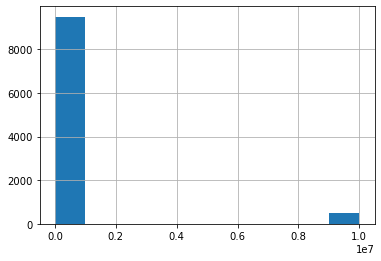

In [17]:
# plot the income distribution
income.hist()

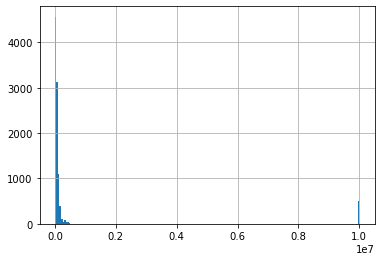

In [18]:
income.hist(bins=200)

**Poll**: Is this plausible for US income distribution?
* A) No, not plausible
* B) Yes, plausible

In [21]:
# select only rows with income less than 9999999
lower_income = (income < 9999999)
lower_income

0       False
1        True
2        True
3        True
4        True
        ...  
9995     True
9996     True
9997     True
9998    False
9999     True
Name: HHINCOME, Length: 10000, dtype: bool

In [22]:
acs99 = acs.where(lower_income)

In [28]:
acs[lower_income]

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            9989, 9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9999],
           dtype='int64', length=9495)

In [29]:
acs99.shape

(10000, 21)

In [30]:
acs99.head()

,ACREHOUS,CLASSWKR,COMMUSE,COSTELEC,COSTGAS,COSTWATR,EDUC,EMPSTAT,FOODSTMP,GRADEATT,...,HHINCOME,HHTYPE,LABFORCE,LOOKING,METRO,OWNERSHP,SCHOOL,STATEICP,UHRSWORK,WKSWORK2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,1.0,4200.0,9993.0,480.0,8.0,1.0,1.0,0.0,...,151000.0,1.0,2.0,3.0,0.0,1.0,1.0,41.0,40.0,6.0
2,1.0,1.0,1.0,4200.0,9993.0,480.0,6.0,1.0,1.0,0.0,...,151000.0,1.0,2.0,3.0,0.0,1.0,1.0,41.0,40.0,6.0
3,1.0,0.0,1.0,4200.0,9993.0,480.0,7.0,3.0,1.0,6.0,...,151000.0,1.0,1.0,1.0,0.0,1.0,2.0,41.0,0.0,0.0
4,1.0,0.0,1.0,4200.0,9993.0,480.0,7.0,3.0,1.0,6.0,...,151000.0,1.0,1.0,1.0,0.0,1.0,2.0,41.0,0.0,0.0


In [31]:
acs99.describe()

,ACREHOUS,CLASSWKR,COMMUSE,COSTELEC,COSTGAS,COSTWATR,EDUC,EMPSTAT,FOODSTMP,GRADEATT,...,HHINCOME,HHTYPE,LABFORCE,LOOKING,METRO,OWNERSHP,SCHOOL,STATEICP,UHRSWORK,WKSWORK2
count,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,...,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.0,9495.000000,9495.000000
mean,0.963560,1.041601,0.920274,2489.090363,5901.423697,1663.254344,5.744286,1.559031,1.186519,0.953028,...,67243.201580,2.092048,1.268246,1.724171,2.371669,1.257609,1.192838,41.0,17.808636,2.380937
std,0.378119,0.975828,0.307659,1484.813450,4489.493535,3174.770482,3.107191,1.153514,0.389546,1.907627,...,64959.369545,1.620569,0.758893,1.202772,1.815580,0.437341,0.466026,0.0,20.975824,2.789677
min,0.000000,0.000000,0.000000,48.000000,48.000000,4.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,41.0,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1560.000000,840.000000,210.000000,4.000000,1.000000,1.000000,0.000000,...,26530.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,41.0,0.000000,0.000000
50%,1.000000,1.000000,1.000000,2280.000000,9993.000000,480.000000,6.000000,1.000000,1.000000,0.000000,...,51000.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,41.0,0.000000,0.000000
75%,1.000000,2.000000,1.000000,3000.000000,9993.000000,840.000000,7.000000,3.000000,1.000000,0.000000,...,87200.000000,3.000000,2.000000,3.000000,4.000000,2.000000,1.000000,41.0,40.000000,6.000000
max,2.000000,2.000000,2.000000,9997.000000,9997.000000,9997.000000,11.000000,3.000000,2.000000,7.000000,...,664040.000000,7.000000,2.000000,3.000000,4.000000,2.000000,2.000000,41.0,99.000000,6.000000


In [32]:
acs99.HHINCOME.describe()

count      9495.000000
mean      67243.201580
std       64959.369545
min           0.000000
25%       26530.000000
50%       51000.000000
75%       87200.000000
max      664040.000000
Name: HHINCOME, dtype: float64

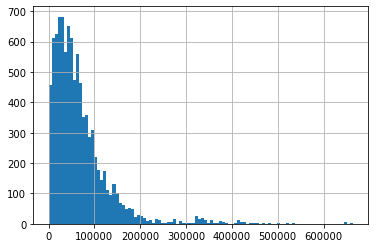

In [33]:
acs99.HHINCOME.hist(bins=100)

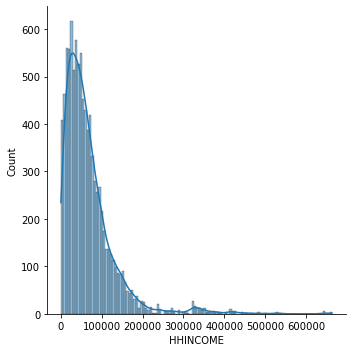

In [34]:
sns.displot(acs99.HHINCOME, kde=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb870d83100>,
      dtype=object)

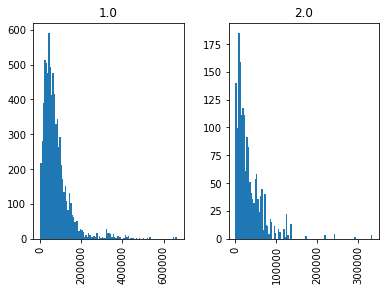

In [35]:
# not easy to compare 
acs99["HHINCOME"].hist(by=acs99["FOODSTMP"], bins=100)

In [39]:
acs99["INCOME+1"] = acs99.HHINCOME + 1

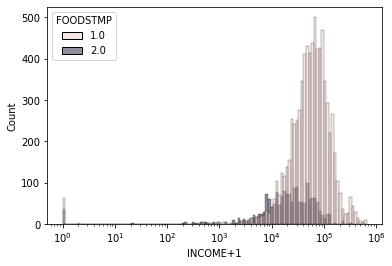

In [40]:
# better 
sns.histplot(
    acs99,
    x="INCOME+1", hue="FOODSTMP",
    # multiple="stack",
    # palette="light:m_r",
    # edgecolor=".3",
    # linewidth=.5,
    log_scale=True,
)

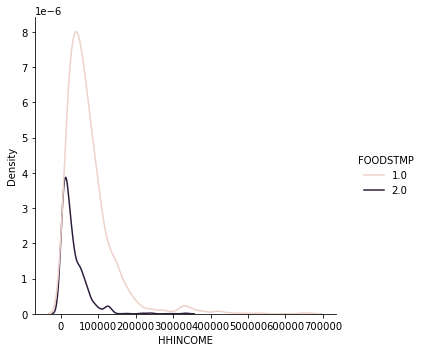

In [37]:
# better 
sns.displot(
    acs99,
    x="HHINCOME", hue="FOODSTMP",
    kind='kde'
)

Tips for making good plots:
* label your axes
* label each curve or each color
* consider semilogy or semilogx
* are tick marks useful?
* make every pixel informative 
* choose plot style to allow easy comparisons between interesting quantities

Quiz: would a semilogx axis help us visualize the income distribution?
1. A) yes
2. B) no

# Now with recoded data
The cleaned data set is in the demos repo as `acs_2013_cleaned.csv`.

In [24]:
url_clean = "https://people.orie.cornell.edu/mru8/orie4741/data/acs_2013_cleaned.csv"
acs = pd.read_csv(url_clean, nrows=10000, na_values='NA') # read 10000 rows from the csv
acs.head()

,ACREHOUS,CLASSWKR,COMMUSE,COSTELEC,COSTGAS,COSTWATR,EDUC,EMPSTAT,FOODSTMP,GRADEATT,...,HHINCOME,HHTYPE,LABFORCE,LOOKING,METRO,OWNERSHP,SCHOOL,STATEICP,UHRSWORK,WKSWORK2
0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3.0,1,6.0,...,NaN,NaN,1.0,1.0,4.0,NaN,2.0,41.0,NaN,NaN
1,1.0,2.0,1.0,4200.0,NaN,480.0,8.0,1.0,1,NaN,...,151000.0,1.0,2.0,NaN,NaN,1.0,1.0,41.0,40.0,6.0
2,1.0,1.0,1.0,4200.0,NaN,480.0,6.0,1.0,1,NaN,...,151000.0,1.0,2.0,NaN,NaN,1.0,1.0,41.0,40.0,6.0
3,1.0,NaN,1.0,4200.0,NaN,480.0,7.0,3.0,1,6.0,...,151000.0,1.0,1.0,1.0,NaN,1.0,2.0,41.0,NaN,NaN
4,1.0,NaN,1.0,4200.0,NaN,480.0,7.0,3.0,1,6.0,...,151000.0,1.0,1.0,1.0,NaN,1.0,2.0,41.0,NaN,NaN


In [25]:
acs.HHINCOME.describe()

count      9394.000000
mean      67966.169789
std       64930.350456
min           1.000000
25%       27200.000000
50%       52000.000000
75%       87960.000000
max      664040.000000
Name: HHINCOME, dtype: float64

**Poll**: Is mean income computed here plausible for US income distribution?
* A) No, this value is too high 
* B) Plausible
* C) No, this value is too low

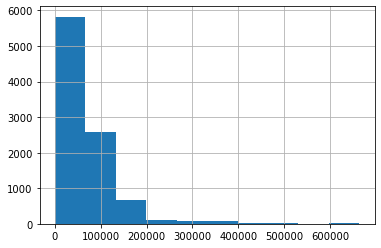

In [26]:
# histogram automatically drops missing values
acs.HHINCOME.hist()

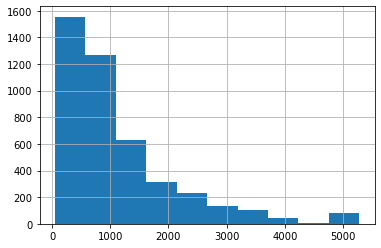

In [27]:
acs.COSTGAS.hist()

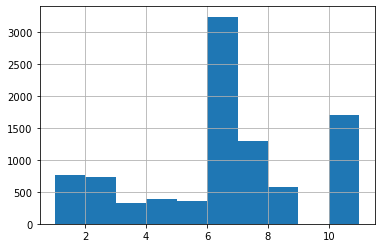

In [28]:
acs.EDUC.hist()

Look at income distribution by :FOODSTMP, :LABFORCE, :OWNERSHP, ...

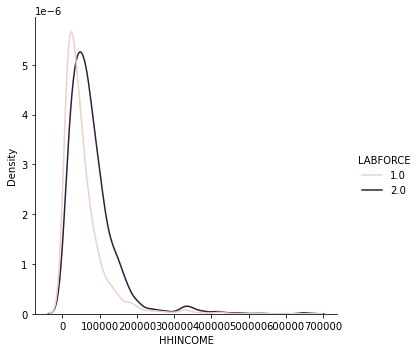

In [29]:
sns.displot(
    acs,
    x="HHINCOME", hue="LABFORCE",
    kind='kde', # also try hist
)

Which makes a nicer plot here?
1. A) kde
2. B) hist

In [30]:
# what fraction of people are working? 
sum(acs.LABFORCE == 2) / sum(~pd.isna(acs.LABFORCE))

0.5395604395604395

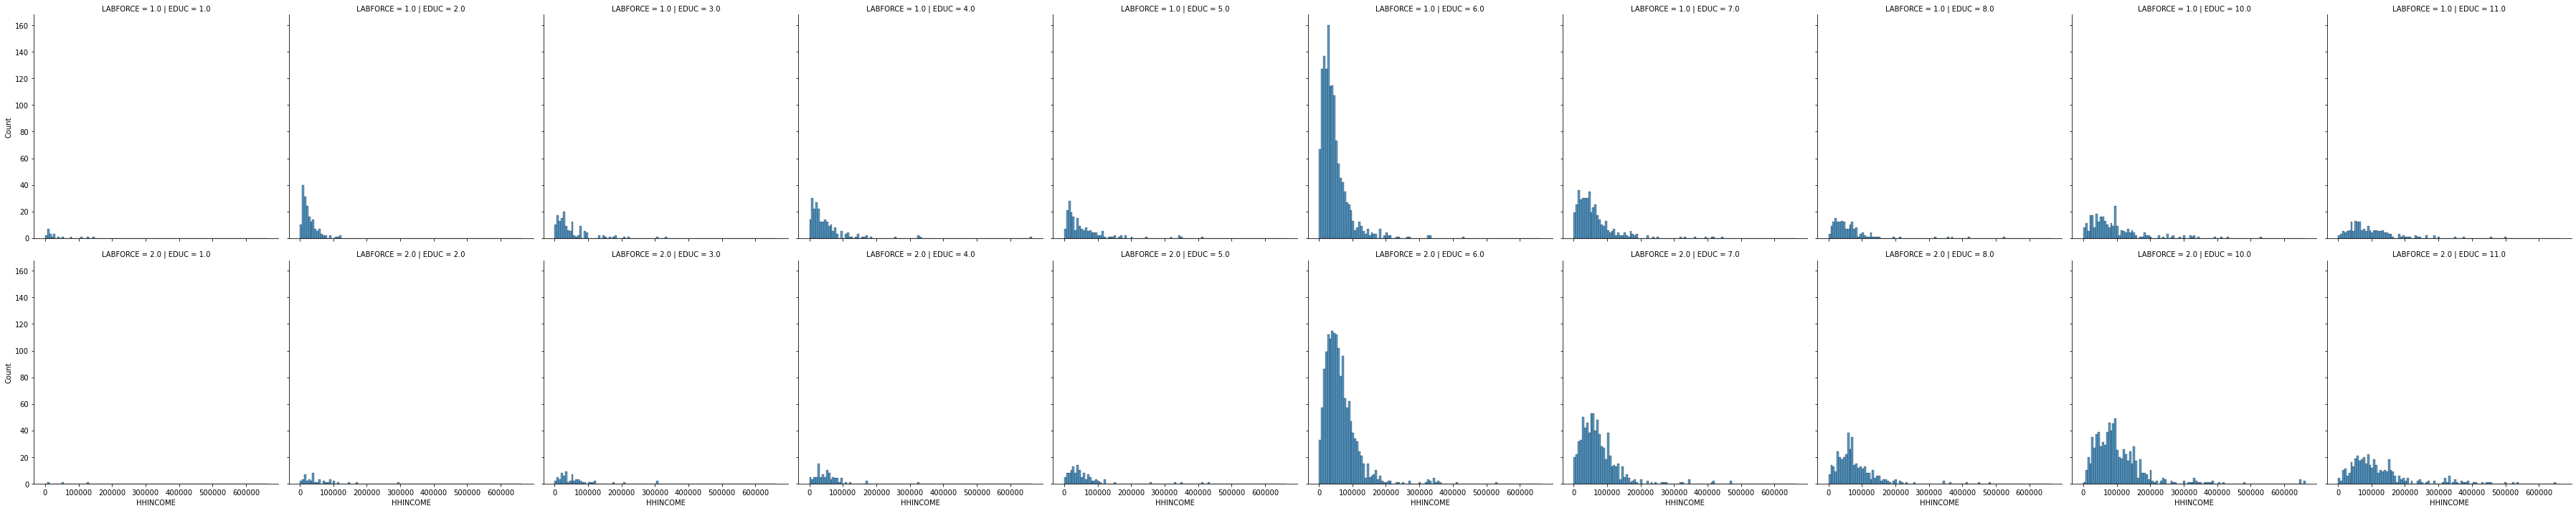

In [31]:
sns.displot(
    acs,
    x="HHINCOME", row="LABFORCE", col="EDUC",
    kind='hist', # also try kde
)

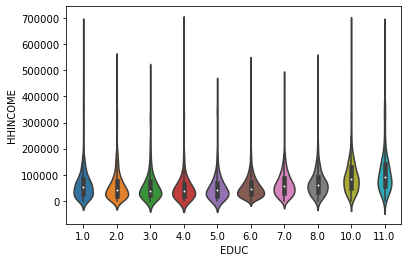

In [32]:
sns.violinplot(
    data=acs,
    y="HHINCOME", x="EDUC"
)

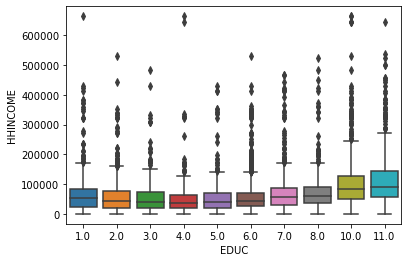

In [33]:
sns.boxplot(
    data=acs,
    y="HHINCOME", x="EDUC"
)

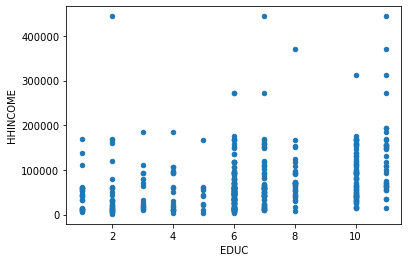

In [34]:
# why not a scatterplot?
acs.head(500).plot.scatter(x="EDUC", y="HHINCOME")

# More great plotting ideas: 

* [MatPlotLib](http://matplotlib.org/) in Python
* [Seaborn](https://seaborn.pydata.org/examples/index.html) in Python
* [ggplot2](http://ggplot2.org/) in R
* [D3](https://d3js.org/) in JavaScript
* Tableau